In [1]:
# General imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress FutureWarnings and TF logs
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# SMEAGOL imports
import smeagol.io, smeagol.models, smeagol.scan, smeagol.enrich, smeagol.visualize, smeagol.variant

2022-06-28 10:09:31.444519: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-28 10:09:31.444537: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
genome_enr = pd.read_excel('SUPPLEMENTARY_MATERIALS/Supp_Data_3_genome_enrichment_results.xlsx', engine='openpyxl')

In [3]:
print(genome_enr.shape)
print(genome_enr.columns.values)

(142622, 14)
['Matrix ID' 'Matrix Width' 'Real sites' 'Number of background sequences'
 'Average number of sites in background sequences'
 'S.D. of number of sites in background sequences' 'p' 'fdr' 'assembly'
 'group' 'RBP' 'family' 'description' 'sense']


In [4]:
# Calculate the fold-change
genome_enr['FoldChange'] =  \
  genome_enr.apply(lambda row: np.divide(row['Real sites'], 
                                         row['Average number of sites in background sequences']), axis=1)

In [5]:
genome_enr['log2FoldChange'] = \
  genome_enr.apply(lambda row: np.log2(row['FoldChange']), axis=1)
genome_enr['log2FoldChange']

/home/ajgruber/Documents/Compute_and_Software/SOFTWARE/miniconda3_envs/VirusHostInteractionAtlas/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  


0         1.317527
1        -0.181421
2         1.123571
3         0.550970
4         1.123571
            ...   
142617        -inf
142618        -inf
142619        -inf
142620        -inf
142621        -inf
Name: log2FoldChange, Length: 142622, dtype: float64

In [6]:
# Replace negative infinite values with -10
genome_enr['log2FoldChange'].replace(-np.Inf, -10, inplace=True)
genome_enr['log2FoldChange']

0          1.317527
1         -0.181421
2          1.123571
3          0.550970
4          1.123571
            ...    
142617   -10.000000
142618   -10.000000
142619   -10.000000
142620   -10.000000
142621   -10.000000
Name: log2FoldChange, Length: 142622, dtype: float64

In [7]:
# Add columns that contain the absolute values
genome_enr['abs_log2FoldChange'] = \
  genome_enr.apply(lambda row: np.absolute(row['log2FoldChange']), axis=1)
genome_enr['abs_log2FoldChange']

0          1.317527
1          0.181421
2          1.123571
3          0.550970
4          1.123571
            ...    
142617    10.000000
142618    10.000000
142619    10.000000
142620    10.000000
142621    10.000000
Name: abs_log2FoldChange, Length: 142622, dtype: float64

# Investigate HCV

We are choosing Genotype 1a as a representative (assembly: GCF_000861845.1).

In [8]:
# Select one specific genome assembly
genome_id = 'GCF_000861845.1'
genome_all = genome_enr.loc[((genome_enr['assembly'] == genome_id) & (genome_enr['sense'] == '+'))]
genome_all.shape

(362, 17)

In [9]:
# Keep only significant entries
genome = genome_all.loc[(genome_all['fdr']<0.05)]
genome.sort_values('abs_log2FoldChange',ascending=False)

,Matrix ID,Matrix Width,Real sites,Number of background sequences,Average number of sites in background sequences,S.D. of number of sites in background sequences,p,fdr,assembly,group,RBP,family,description,sense,FoldChange,log2FoldChange,abs_log2FoldChange
17742,M232_0.6,7,70,1000,0.713,1.053442,1.681655e-111,6.087592e-109,GCF_000861845.1,IV,ELAVL1,Flaviviridae,NC_004102.1 Hepatitis C virus genotype 1,+,98.176718,6.617309,6.617309
17876,M150_0.6,7,74,1000,1.069,1.315283,1.117556e-106,2.022776e-104,GCF_000861845.1,IV,RALY,Flaviviridae,NC_004102.1 Hepatitis C virus genotype 1,+,69.223573,6.113192,6.113192
17874,M149_0.6,7,74,1000,1.265,1.436955,2.372920e-101,2.863323e-99,GCF_000861845.1,IV,CPEB4,Flaviviridae,NC_004102.1 Hepatitis C virus genotype 1,+,58.498024,5.870316,5.870316
17698,s101,7,70,1000,1.420,1.383298,7.398795e-91,3.826234e-89,GCF_000861845.1,IV,ELAVL1,Flaviviridae,NC_004102.1 Hepatitis C virus genotype 1,+,49.295775,5.623392,5.623392
17646,M031_0.6,7,70,1000,1.502,1.307557,3.475533e-89,1.397937e-87,GCF_000861845.1,IV,ELAVL1,Flaviviridae,NC_004102.1 Hepatitis C virus genotype 1,+,46.604527,5.542398,5.542398
17880,M158_0.6,7,74,1000,1.615,1.512304,1.192730e-93,8.635365e-92,GCF_000861845.1,IV,HNRNPCL1,Flaviviridae,NC_004102.1 Hepatitis C virus genotype 1,+,45.820433,5.517919,5.517919
17824,M025_0.6,7,74,1000,1.615,1.512304,1.192730e-93,8.635365e-92,GCF_000861845.1,IV,HNRNPC,Flaviviridae,NC_004102.1 Hepatitis C virus genotype 1,+,45.820433,5.517919,5.517919
17578,encode_TRNAU1AP_1,7,70,1000,1.715,1.355586,3.034515e-85,1.098494e-83,GCF_000861845.1,IV,TRNAU1AP,Flaviviridae,NC_004102.1 Hepatitis C virus genotype 1,+,40.816327,5.351074,5.351074
17552,M156_0.6,7,75,1000,1.931,1.605870,1.237725e-89,5.600706e-88,GCF_000861845.1,IV,TIA1,Flaviviridae,NC_004102.1 Hepatitis C virus genotype 1,+,38.839979,5.279471,5.279471
17540,M077_0.6,7,77,1000,1.997,1.786108,9.677170e-92,5.838559e-90,GCF_000861845.1,IV,U2AF2,Flaviviridae,NC_004102.1 Hepatitis C virus genotype 1,+,38.557837,5.268952,5.268952


In [10]:
# How many significant PWMs do we have
genome.shape

(31, 17)

In [11]:
# Aggregate by RBP (use only the entry with the biggest FC)
idx = genome.groupby(['RBP'])['abs_log2FoldChange'].transform(max) == genome['abs_log2FoldChange']
genome_RBP = genome[idx]
# How many significant RBPs do we have
genome_RBP.shape

(23, 17)

In [12]:
genome_RBP = genome_RBP.sort_values('abs_log2FoldChange',ascending=False)
genome_RBP['Enr_nr'] = np.arange(1, genome_RBP.shape[0]+1)
genome_RBP

,Matrix ID,Matrix Width,Real sites,Number of background sequences,Average number of sites in background sequences,S.D. of number of sites in background sequences,p,fdr,assembly,group,RBP,family,description,sense,FoldChange,log2FoldChange,abs_log2FoldChange,Enr_nr
17742,M232_0.6,7,70,1000,0.713,1.053442,1.681655e-111,6.087592e-109,GCF_000861845.1,IV,ELAVL1,Flaviviridae,NC_004102.1 Hepatitis C virus genotype 1,+,98.176718,6.617309,6.617309,1
17876,M150_0.6,7,74,1000,1.069,1.315283,1.117556e-106,2.022776e-104,GCF_000861845.1,IV,RALY,Flaviviridae,NC_004102.1 Hepatitis C virus genotype 1,+,69.223573,6.113192,6.113192,2
17874,M149_0.6,7,74,1000,1.265,1.436955,2.372920e-101,2.863323e-99,GCF_000861845.1,IV,CPEB4,Flaviviridae,NC_004102.1 Hepatitis C virus genotype 1,+,58.498024,5.870316,5.870316,3
17880,M158_0.6,7,74,1000,1.615,1.512304,1.192730e-93,8.635365e-92,GCF_000861845.1,IV,HNRNPCL1,Flaviviridae,NC_004102.1 Hepatitis C virus genotype 1,+,45.820433,5.517919,5.517919,4
17824,M025_0.6,7,74,1000,1.615,1.512304,1.192730e-93,8.635365e-92,GCF_000861845.1,IV,HNRNPC,Flaviviridae,NC_004102.1 Hepatitis C virus genotype 1,+,45.820433,5.517919,5.517919,5
17578,encode_TRNAU1AP_1,7,70,1000,1.715,1.355586,3.034515e-85,1.098494e-83,GCF_000861845.1,IV,TRNAU1AP,Flaviviridae,NC_004102.1 Hepatitis C virus genotype 1,+,40.816327,5.351074,5.351074,6
17552,M156_0.6,7,75,1000,1.931,1.605870,1.237725e-89,5.600706e-88,GCF_000861845.1,IV,TIA1,Flaviviridae,NC_004102.1 Hepatitis C virus genotype 1,+,38.839979,5.279471,5.279471,7
17540,M077_0.6,7,77,1000,1.997,1.786108,9.677170e-92,5.838559e-90,GCF_000861845.1,IV,U2AF2,Flaviviridae,NC_004102.1 Hepatitis C virus genotype 1,+,38.557837,5.268952,5.268952,8
17586,encode_BOLL_1,7,79,1000,4.104,2.173916,4.046879e-71,1.220809e-69,GCF_000861845.1,IV,BOLL,Flaviviridae,NC_004102.1 Hepatitis C virus genotype 1,+,19.249513,4.266750,4.266750,9
17440,s100,7,93,1000,6.968,2.941025,1.539986e-69,4.288267e-68,GCF_000861845.1,IV,PTBP1,Flaviviridae,NC_004102.1 Hepatitis C virus genotype 1,+,13.346728,3.738414,3.738414,10


### Create the HCV Histogram

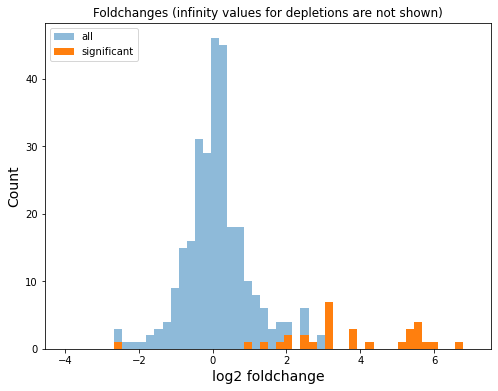

In [13]:
# NOTE: The min and max are important for having identical bins in the figure
xmin = -4
xmax = 7

# HISTOGRAM for HCV Figure
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(genome_all['log2FoldChange'].values, 
         range=[xmin, xmax],
         bins=50, 
         alpha = 0.5, 
         label='all')
plt.hist(genome['log2FoldChange'].values, 
         range=[xmin, xmax],
         bins=50, 
         alpha = 1.0, 
         label='significant')
plt.xlabel("log2 foldchange", size=14)
plt.ylabel("Count", size=14)
plt.title("Foldchanges (infinity values for depletions are not shown)")
plt.legend(loc='upper left')
plt.savefig("RESULTS/HCV_foldchanges_hist.pdf")
plt.show()

### Create the sliding window analysis for the most enriched PWM

In [15]:
# Read in the PWMs
pwm_file = "../DATA/PWMs/attract_rbpdb_encode_filtered_human_pwms.h5"
pwms = pd.read_hdf(pwm_file, key="data")
pwms.shape

(362, 10)

In [88]:
pwms[pwms['Gene_name'].str.contains('ELAVL1')]

,Matrix_id,Gene_name,Gene_id,Experiment_description,source,freqs,probs,len,entropy,weights
24,M108_0.6,ELAVL1,ENSG00000066044,RNAcompete,Attract,NaN,"[[0.058323853, 0.058323853, 0.058323853, 0.825...",7,6.323243,"[[-2.09977, -2.09977, -2.09977, 1.7225157], [-..."
34,M112_0.6,ELAVL1,ENSG00000066044,RNAcompete,Attract,NaN,"[[0.03320362, 0.03320362, 0.03320362, 0.900389...",7,6.718449,"[[-2.9125156, -2.9125156, -2.9125156, 1.848620..."
75,M232_0.6,ELAVL1,ENSG00000066044,RNAcompete,Attract,NaN,"[[0.009889737, 0.11367061, 0.10729123, 0.76914...",7,5.752390,"[[-4.659852, -1.1370689, -1.2203959, 1.621334]..."
123,s101,ELAVL1,ENSG00000066044,RNAcompete using recombinant protein,Attract,NaN,"[[0.001984127, 0.001984127, 0.001984127, 0.994...",7,3.092811,"[[-6.9772797, -6.9772797, -6.9772797, 1.991386..."
124,M031_0.6,ELAVL1,ENSG00000066044,RNAcompete,Attract,NaN,"[[0.0064795236, 0.0064795236, 0.0064795236, 0....",7,4.748927,"[[-5.2698965, -5.2698965, -5.2698965, 1.971679..."
208,M127_0.6,ELAVL1,ENSG00000066044,RNAcompete,Attract,NaN,"[[0.21075623, 0.032594193, 0.032594193, 0.7240...",7,5.556472,"[[-0.24635284, -2.9392412, -2.9392412, 1.53417..."
223,1170,ELAVL1,ENSG00000066044,RNAcompete,RBPDB,"[[0.341772, 0.025316, 0.632911, 0.0], [0.0, 0....","[[0.3408637038254494, 0.02754062132734785, 0.6...",4,2.405121,"[[0.447266890337397, -3.1822950821619775, 1.33..."


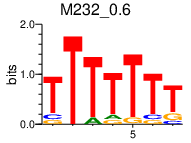

In [16]:
PWM_to_plot = 'M232_0.6'
smeagol.visualize.plot_pwm(pwms, Matrix_id=PWM_to_plot)

## Load the HCV genome (we choose Genotype 1a as a representative)

In [37]:
genome_id

'GCF_000861845.1'

In [38]:
# In Supp. Data 1 (Selected genomes) the path to the ftp download can be looked up for 'GCF_000861845.1'

# Downlaod the genome
if not os.path.exists('GCF_000861845.1_ViralProj15432_genomic.fna.gz'):
    !wget ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/861/845/GCF_000861845.1_ViralProj15432/GCF_000861845.1_ViralProj15432_genomic.fna.gz

In [39]:
genome = smeagol.io.read_fasta('GCF_000861845.1_ViralProj15432_genomic.fna.gz')
genome

Read 1 records from GCF_000861845.1_ViralProj15432_genomic.fna.gz


[SeqRecord(seq=Seq('GCCAGCCCCCTGATGGGGGCGACACTCCACCATGAATCACTCCCCTGTGAGGAA...TGT'), id='NC_004102.1', name='NC_004102.1', description='NC_004102.1 Hepatitis C virus genotype 1, complete genome', dbxrefs=[])]

In [41]:
# Encode all these PWMs as a convolutional model. This will allow us to scan the sequence.
model = smeagol.models.PWMModel(pwms)

2022-06-28 15:16:15.672717: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-28 15:16:15.673489: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-28 15:16:15.674309: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (elitebook): /proc/driver/nvidia/version does not exist
2022-06-28 15:16:15.675582: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [42]:
sites = smeagol.scan.scan_sequences(genome, model, threshold=0.8, rcomp='both', 
                                    outputs=['sites'], score=True)

2022-06-28 15:16:18.123498: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-06-28 15:16:18.144126: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2803200000 Hz


In [43]:
# Get the sites
real_sites = sites['sites']
real_sites.shape

(15354, 10)

In [44]:
real_sites = real_sites[real_sites.sense=="+"]
real_sites.shape

(8356, 10)

In [45]:
real_sites['Matrix_id'].unique()

array(['64', '922', 'encode_PCBP1_1', 'encode_SRSF5_2', 's38',
       'encode_RBM23_1', 'encode_TAF15_1', '131', '171', '46', '142',
       '182', 'encode_HNRNPH2_1', 'encode_FUS_1', 'encode_HNRNPA2B1_1',
       'encode_RBM24_3', 'encode_RBM25_1', 's35', 'encode_RBM6_2', 's54',
       'encode_PRR3_3', 'encode_RBM47_1', 'encode_NOVA1_2', '99',
       'encode_PCBP4_1', '155', 'M178_0.6', 'encode_SRSF9_1', '352',
       'encode_RBM45_2', 's40', 's68', '1384', 'encode_HNRNPK_2',
       'encode_RBM45_1', '1343', 'encode_SRSF10_1', 's42', 'encode_UNK_1',
       'encode_HNRNPA0_2', 'encode_TARDBP_1', 'encode_TARDBP_2',
       'M354_0.6', 'encode_MBNL1_2', 'encode_SRSF2_1', 'encode_SRSF5_1',
       'encode_SRSF8_1', '175', 'encode_RBM6_1', 'encode_SRSF2_2',
       'M106_0.6', 's97', 'M333_0.6', 'M043_0.6', '167', 'encode_NOVA1_1',
       'encode_UNK_2', 'encode_SFPQ_2', '351', 'encode_RBM22_1', 's20',
       's31', 'encode_RBM45_4', '1393', 'encode_ZNF326_1', 'M227_0.6',
       's6', 's9', 's1

In [46]:
real_sites

,id,name,sense,start,Matrix_id,width,end,score,max_score,frac_score
0,NC_004102.1,NC_004102.1,+,1,64,4,5,5.393495,5.393495,1.000000
1,NC_004102.1,NC_004102.1,+,1,922,4,5,6.148969,6.148969,1.000000
2,NC_004102.1,NC_004102.1,+,4,encode_PCBP1_1,5,9,8.331131,8.331131,1.000000
3,NC_004102.1,NC_004102.1,+,4,encode_SRSF5_2,5,9,9.015263,9.015263,1.000000
4,NC_004102.1,NC_004102.1,+,5,s38,4,9,3.630326,3.951535,0.918713
...,...,...,...,...,...,...,...,...,...,...
8351,NC_004102.1,NC_004102.1,+,9632,s35,6,9638,6.907557,6.907557,1.000000
8352,NC_004102.1,NC_004102.1,+,9634,1343,6,9640,6.994144,6.994144,1.000000
8353,NC_004102.1,NC_004102.1,+,9634,encode_SRSF10_1,5,9639,7.382369,8.617389,0.856683
8354,NC_004102.1,NC_004102.1,+,9640,64,4,9644,5.393495,5.393495,1.000000


In [57]:
pwms[pwms['Gene_name'].str.contains('ELAVL')]

,Matrix_id,Gene_name,Gene_id,Experiment_description,source,freqs,probs,len,entropy,weights
24,M108_0.6,ELAVL1,ENSG00000066044,RNAcompete,Attract,NaN,"[[0.058323853, 0.058323853, 0.058323853, 0.825...",7,6.323243,"[[-2.09977, -2.09977, -2.09977, 1.7225157], [-..."
34,M112_0.6,ELAVL1,ENSG00000066044,RNAcompete,Attract,NaN,"[[0.03320362, 0.03320362, 0.03320362, 0.900389...",7,6.718449,"[[-2.9125156, -2.9125156, -2.9125156, 1.848620..."
75,M232_0.6,ELAVL1,ENSG00000066044,RNAcompete,Attract,NaN,"[[0.009889737, 0.11367061, 0.10729123, 0.76914...",7,5.752390,"[[-4.659852, -1.1370689, -1.2203959, 1.621334]..."
92,s0,ELAVL2,ENSG00000107105,SELEX,Attract,NaN,"[[0.20007987, 0.080271564, 0.00039936102, 0.71...",9,7.553506,"[[-0.32135203, -1.6389672, -9.290019, 1.524563..."
101,s3,ELAVL2,ENSG00000107105,SELEX,Attract,NaN,"[[0.39880952, 0.39880952, 0.20039682, 0.001984...",7,3.241771,"[[0.67377174, 0.67377174, -0.31906846, -6.9772..."
123,s101,ELAVL1,ENSG00000066044,RNAcompete using recombinant protein,Attract,NaN,"[[0.001984127, 0.001984127, 0.001984127, 0.994...",7,3.092811,"[[-6.9772797, -6.9772797, -6.9772797, 1.991386..."
124,M031_0.6,ELAVL1,ENSG00000066044,RNAcompete,Attract,NaN,"[[0.0064795236, 0.0064795236, 0.0064795236, 0....",7,4.748927,"[[-5.2698965, -5.2698965, -5.2698965, 1.971679..."
163,s2,ELAVL2,ENSG00000107105,SELEX,Attract,NaN,"[[0.25, 0.49752474, 0.25, 0.0024752475], [0.00...",6,3.344903,"[[0.0, 0.9928402, 0.0, -6.6582117], [-6.658211..."
189,s1,ELAVL2,ENSG00000107105,SELEX,Attract,NaN,"[[0.4275568, 0.28551137, 0.28551137, 0.0014204...",5,3.173026,"[[0.77418804, 0.19162013, 0.19162013, -7.45943..."
196,M329_0.6,ELAVL2,ENSG00000107105,SELEX,Attract,NaN,"[[0.25, 0.01, 0.01, 0.73], [0.01, 0.05, 0.01, ...",9,6.339198,"[[0.0, -4.643856, -4.643856, 1.5459684], [-4.6..."


In [61]:
r = smeagol.enrich.enrich_in_sliding_windows(real_sites, 
                                             genome, width=500, matrix_id='M232_0.6', shift=None)
r.head()

,id,start,end,len,count,tot_count,expected,odds,p,padj
0,NC_004102.1,0,500,494,0,70,3.587137,0.0,0.04991,0.052537
1,NC_004102.1,500,1000,494,0,70,3.587137,0.0,0.04991,0.052537
2,NC_004102.1,1000,1500,494,0,70,3.587137,0.0,0.04991,0.052537
3,NC_004102.1,1500,2000,494,0,70,3.587137,0.0,0.04991,0.052537
4,NC_004102.1,2000,2500,494,0,70,3.587137,0.0,0.04991,0.052537


In [62]:
r[(r.padj<0.05) & (r.odds > 1)]

,id,start,end,len,count,tot_count,expected,odds,p,padj
18,NC_004102.1,9000,9500,494,68,70,3.587137,21.822938,7.005012e-53,1.401002e-51


In [63]:
r[(r.padj<0.05) & (r.odds < 1)]

,id,start,end,len,count,tot_count,expected,odds,p,padj


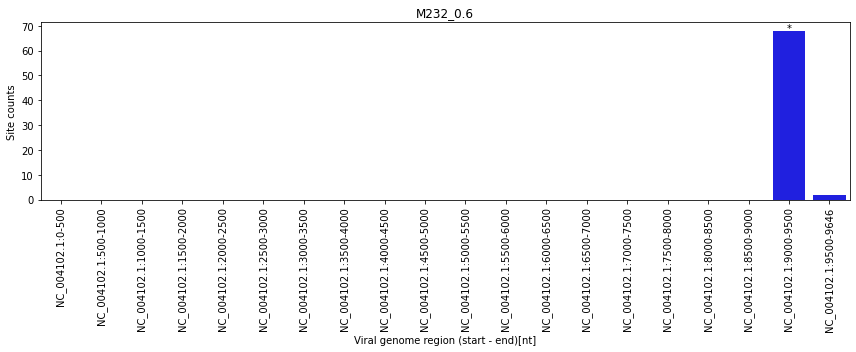

In [64]:
r['window'] = r.index
r['sig'] = r.padj<0.05
r['window_name'] = r.apply(lambda row: row.id + ':' + str(row.start) + '-' + str(row.end), axis=1)
smeagol.visualize.sliding_window_enrichment_plot(sliding_window_df=r, 
                            x_var='window', 
                            y_var='count', 
                            xticklabels='window_name', title='M232_0.6')

In [65]:
print('----------------------')
print(genome[0].seq[9000:9500])
print('----------------------')
print(genome[0].seq[9500:len(genome[0].seq)])

----------------------
ATGGCCTCAGCGCATTTTCACTCCACAGTTACTCTCCAGGTGAAATCAATAGGGTGGCCGCATGCCTCAGAAAACTTGGGGTCCCGCCCTTGCGAGCTTGGAGACACCGGGCCCGGAGCGTCCGCGCTAGGCTTCTGTCCAGAGGAGGCAGGGCTGCCATATGTGGCAAGTACCTCTTCAACTGGGCAGTAAGAACAAAGCTCAAACTCACTCCAATAGCGGCCGCTGGCCGGCTGGACTTGTCCGGTTGGTTCACGGCTGGCTACAGCGGGGGAGACATTTATCACAGCGTGTCTCATGCCCGGCCCCGCTGGTTCTGGTTTTGCCTACTCCTGCTCGCTGCAGGGGTAGGCATCTACCTCCTCCCCAACCGATGAAGGTTGGGGTAAACACTCCGGCCTCTTAGGCCATTTCCTGTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTCTTTTTTTTTTTTTTTTTCCTTTTTTTTTTTT
----------------------
TTTTTTTTCTTTCCTTCTTTTTTCCTTTCTTTTCCTTCCTTCTTTAATGGTGGCTCCATCTTAGCCCTAGTCACGGCTAGCTGTGAAAGGTCCGTGAGCCGCATGACTGCAGAGAGTGCTGATACTGGCCTCTCTGCAGATCATGT


# (-) ssRNA viruses

## Ebola virus

In [68]:
genome_id = 'GCF_000848505.1'
genome_enr_Ebola = genome_enr.loc[((genome_enr['assembly'] == genome_id) & (genome_enr['sense'] == '+'))]
genome_enr_Ebola.shape

(362, 17)

In [69]:
# Keep only significant entries
genome_enr_Ebola = genome_enr_Ebola.loc[(genome_enr_Ebola['fdr']<0.05)]
genome_enr_Ebola.shape

(1, 17)

In [70]:
genome_enr_Ebola

,Matrix ID,Matrix Width,Real sites,Number of background sequences,Average number of sites in background sequences,S.D. of number of sites in background sequences,p,fdr,assembly,group,RBP,family,description,sense,FoldChange,log2FoldChange,abs_log2FoldChange
70969,75,6,762,1000,652.359,34.934203,0.00002,0.007222,GCF_000848505.1,V,PPIE,Filoviridae,NC_002549.1 Zaire ebolavirus isolate Ebola vir...,+,1.168069,0.224125,0.224125


In [71]:
# Download the PWMs
pwms = smeagol.io.load_rbpdb(species='human')

Folder motifs/rbpdb/human already exists.


In [72]:
# Read in the PWMs
pwm_file = "../DATA/PWMs/attract_rbpdb_encode_filtered_human_pwms.h5"
pwms = pd.read_hdf(pwm_file, key="data")
pwms.shape

(362, 10)

In [73]:
pwms[pwms.Matrix_id=='75']

,Matrix_id,Gene_name,Gene_id,Experiment_description,source,freqs,probs,len,entropy,weights
51,75,PPIE,ENSG00000084072,single RNA affinity purification,Attract,NaN,"[[0.49984384, 0.00015615241, 0.00015615241, 0....",6,6.024523,"[[0.9995493, -10.644757, -10.644757, 0.9995493..."


In [76]:
# Downlaod the genome
if not os.path.exists('GCF_000848505.1_ViralProj14703_genomic.fna.gz'):
    !wget ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/848/505/GCF_000848505.1_ViralProj14703/GCF_000848505.1_ViralProj14703_genomic.fna.gz

In [77]:
# Read in the genome
genome = smeagol.io.read_fasta('GCF_000848505.1_ViralProj14703_genomic.fna.gz')
genome

Read 1 records from GCF_000848505.1_ViralProj14703_genomic.fna.gz


[SeqRecord(seq=Seq('CGGACACACAAAAAGAAAGAAGAATTTTTAGGATCTTTTGTGTGCGAATAACTA...CCA'), id='NC_002549.1', name='NC_002549.1', description='NC_002549.1 Zaire ebolavirus isolate Ebola virus/H.sapiens-tc/COD/1976/Yambuku-Mayinga, complete genome', dbxrefs=[])]

On NCBI we can have a look at the sequence here: https://www.ncbi.nlm.nih.gov/nuccore/10313991 

In [78]:
# Scan the genome
rcomp='only'
threshold=0.8
sites = smeagol.scan.scan_sequences(genome, model, threshold=threshold, rcomp=rcomp, 
                                    outputs=['sites'], score=True)

In [79]:
# Scan for enrichment
simN=100 # Number of times to shuffle (use 1000 if you have enough memory to do so)
simK=2   # k-mer length to keep fixed
enrichment_result = smeagol.enrich.enrich_in_genome(genome, model, simN=simN, simK=simK, 
                                                    rcomp=rcomp, threshold=threshold, 
                                                    combine_seqs=True, background='binomial')

Shuffled 1 sequence(s) 100 times while conserving k-mer frequency for k = 2.


2022-06-28 15:48:30.844698: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 878484224 exceeds 10% of free system memory.
2022-06-28 15:48:30.958959: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 878484224 exceeds 10% of free system memory.
2022-06-28 15:48:31.067749: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 878484224 exceeds 10% of free system memory.
2022-06-28 15:48:31.217492: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2745263200 exceeds 10% of free system memory.


In [80]:
enr = enrichment_result['enrichment']
enr.head()

,Matrix_id,width,sense,num,len,avg,sd,adj_len,p,fdr
0,75,6,-,762.0,100,655.21,35.291083,18954,0.000032,0.011699
1,encode_NOVA1_2,5,-,32.0,100,17.10,4.096069,18955,0.000985,0.178364
2,s27,6,-,41.0,100,24.35,4.916217,18954,0.002143,0.193920
3,s28,6,-,41.0,100,24.35,4.916217,18954,0.002143,0.193920
4,s6,5,-,246.0,100,294.89,13.560113,18955,0.003650,0.220199


# Investigate (-)ssRNA virus genome results

Get all the Group V virus results

In [81]:
group_V = genome_enr.loc[(genome_enr['group'] == 'V')]
group_V.shape

(73844, 17)

In [83]:
group_V_EIF4B352 = group_V.loc[(genome_enr['Matrix ID'] == 352)]
group_V_EIF4B352.shape

(204, 17)

In [ ]:
group_V_EIF4B352_sign = group_V_EIF4B352[(group_V_EIF4B352['fdr'] < 0.05)]
group_V_EIF4B352_sign.shape

In [ ]:
group_V_EIF4B352_sign

## Investigate NC_004910.1 Influenza A virus (GCF_000851145.1)

In [ ]:
# Downlaod the genome
if not os.path.exists('GCF_000851145.1_ViralMultiSegProj14892_genomic.fna.gz'):
    !wget ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/851/145/GCF_000851145.1_ViralMultiSegProj14892/GCF_000851145.1_ViralMultiSegProj14892_genomic.fna.gz

In [ ]:
# Read in the genome
genome = smeagol.io.read_fasta('GCF_000851145.1_ViralMultiSegProj14892_genomic.fna.gz')
genome

## Investigate NC_006307.2 Influenza C virus (GCF_000856665.10)

In [ ]:
# Downlaod the genome
if not os.path.exists('GCF_000856665.10_ViralMultiSegProj15055_genomic.fna.gz'):
    !wget ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/856/665/GCF_000856665.10_ViralMultiSegProj15055/GCF_000856665.10_ViralMultiSegProj15055_genomic.fna.gz

In [ ]:
# Read in the genome
genome = smeagol.io.read_fasta('GCF_000856665.10_ViralMultiSegProj15055_genomic.fna.gz')
genome

## Investigate NC_006383.2 Peste des petits ruminants virus (GCF_000866445.1)

In [ ]:
# Downlaod the genome
if not os.path.exists('GCF_000866445.1_ViralProj15499_genomic.fna.gz'):
    !wget ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/866/445/GCF_000866445.1_ViralProj15499/GCF_000866445.1_ViralProj15499_genomic.fna.gz

In [ ]:
# Read in the genome
genome = smeagol.io.read_fasta('GCF_000866445.1_ViralProj15499_genomic.fna.gz')
genome

In [ ]:
# Scan for enrichment
rcomp='both'
threshold=0.8
simN=100 # Number of times to shuffle (use 1000 if you have enough memory to do so)
simK=2   # k-mer length to keep fixed
enrichment_result = smeagol.enrich.enrich_in_genome(genome, model, simN=simN, simK=simK, 
                                                    rcomp=rcomp, threshold=threshold, 
                                                    combine_seqs=True, background='binomial')

In [ ]:
enr = enrichment_result['enrichment']
enr.loc[(enr['Matrix_id'] == '352')]